# AIR QUALITY PREDICTION USING RIDGE AND LASSO REGRESSION

- https://en.tutiempo.net/climate  Using this website builded the Webscrapping with the library of beautyfulsoup


In this Project Scrapping the data from the website and after taken data we calcluated the daily hours Air Qulaity data into daily average data of 2013 to 2017  for target value  PM2.5 after We Predicting the Air Quality using Ridge and Lasso Regression and also comparison between previous model Linear Regression and get which is the best for this usecase

Columns
- T	Average annual temperature
- TM	Annual average maximum temperature
- Tm	Average annual minimum temperature
- PP	Rain or snow precipitation total annual
- V	Annual average wind speed
- RA	Number of days with rain
- SN	Number of days with snow
- TS	Number of days with storm
- FG	Number of foggy days
- TN	Number of days with tornado
- GR	Number of days with hail

Lets import required libraries to the project

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets extract the data from the file

In [20]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [21]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

Lets Check the dataset have null values or not uisng heatmap

<AxesSubplot:>

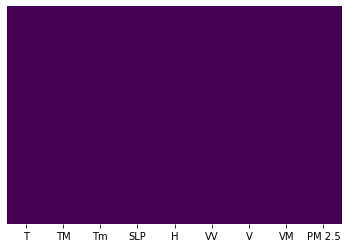

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

As we seen here PM 2.5 has one null values lets drop the one column beacause one values of drop will not effect to the model...

In [24]:
df = df.dropna()

In [25]:
X = df.iloc[:,:-1]  ##Independent Features, 
#In this we just drop the last feature and consider reamaining features as 
#independent features

Y = df.iloc[:,-1] ##Dependent Features,
##In this we just drop all the feature instaead last features
#for dependent features

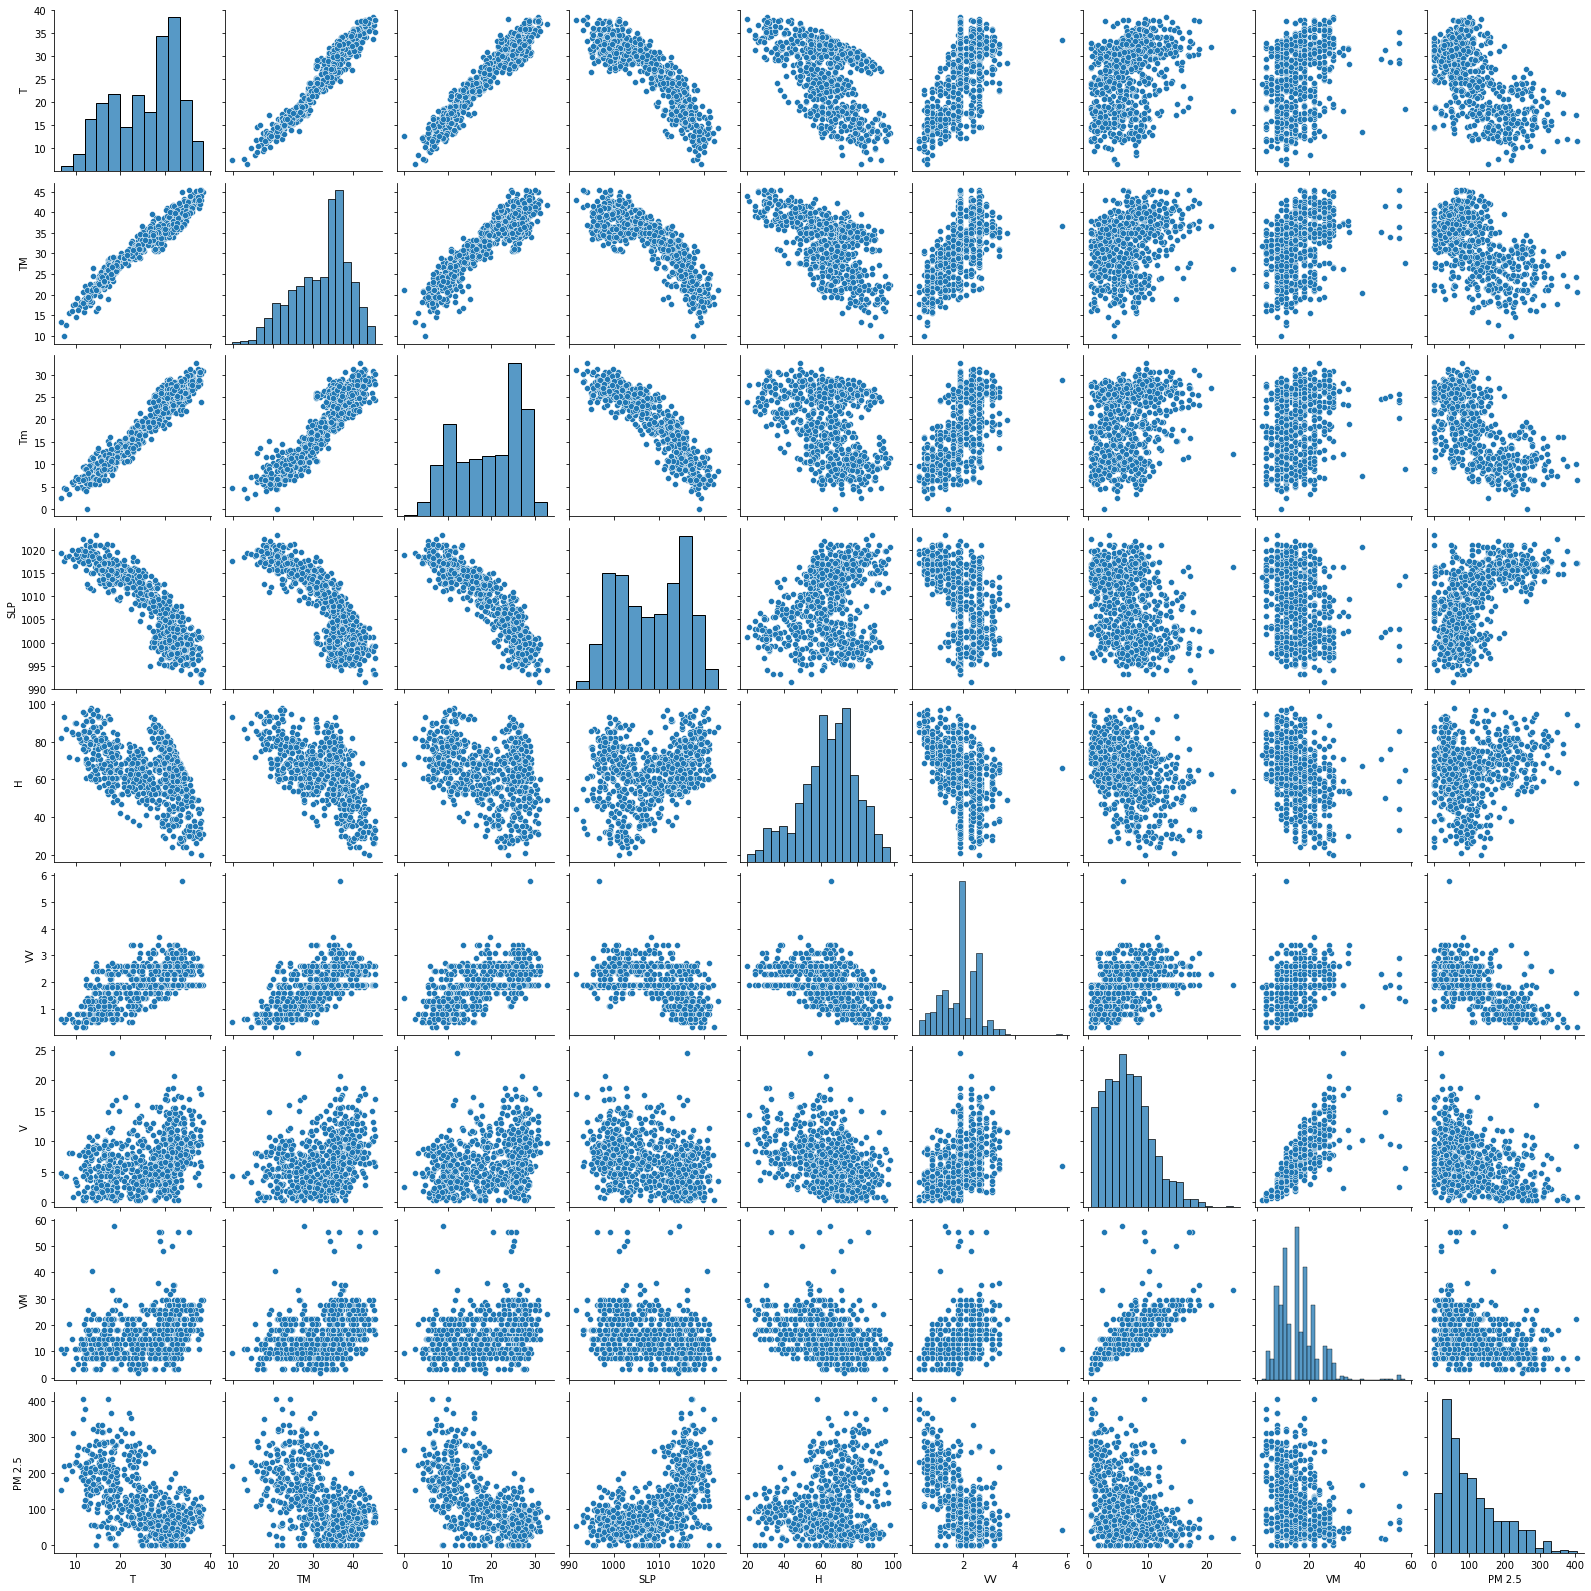

In [26]:
sns.pairplot(df)

Check the all Features Correlations

In [27]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967276  0.958892 -0.884383 -0.518870  0.622637  0.326067   
TM      0.967276  1.000000  0.896699 -0.829254 -0.599629  0.598479  0.320116   
Tm      0.958892  0.896699  1.000000 -0.909514 -0.315305  0.560299  0.312904   
SLP    -0.884383 -0.829254 -0.909514  1.000000  0.274196 -0.491842 -0.346130   
H      -0.518870 -0.599629 -0.315305  0.274196  1.000000 -0.475279 -0.399079   
VV      0.622637  0.598479  0.560299 -0.491842 -0.475279  1.000000  0.402884   
V       0.326067  0.320116  0.312904 -0.346130 -0.399079  0.402884  1.000000   
VM      0.287138  0.299508  0.259431 -0.299830 -0.370981  0.347493  0.760777   
PM 2.5 -0.628336 -0.569381 -0.669059  0.615615  0.174658 -0.628621 -0.354799   

              VM    PM 2.5  
T       0.287138 -0.628336  
TM      0.299508 -0.569381  
Tm      0.259431 -0.669059  
SLP    -0.299830  0.615615  
H      -0.370981  0.174658  
VV      0.347493 -0.628621  
V       0.760777 -0.354799  
VM      1.000000 -0.283695  
PM 2.5 -0.283695  1.000000

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [28]:
#Lets get Correlations of each features in dataset
corrmat = df.corr()

In [29]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

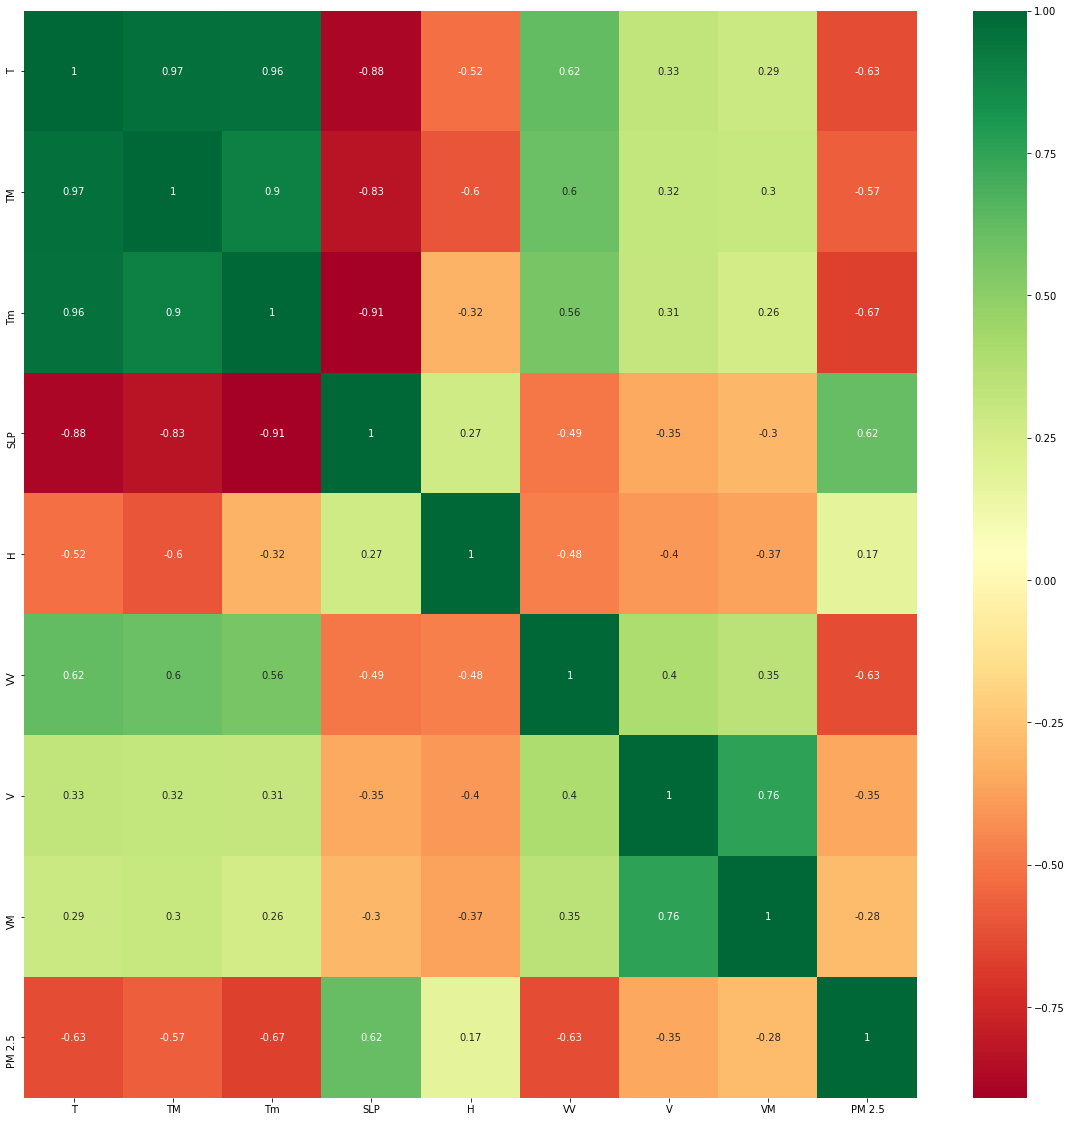

In [30]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)



ExtraTreesRegressor()

In [32]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

Lets Check the which features have more values using ensemble techniques of Feature selection

In [33]:
print(model.feature_importances_)

[0.11855508 0.09623729 0.15476094 0.16552387 0.08377274 0.28806088
 0.05383221 0.03925698]


Lets visualize the data with top 5 features and top 5 features will aply to the model

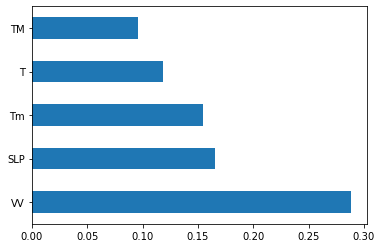

In [34]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In first we apply the machine learning lets just see for the referebce comparison

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

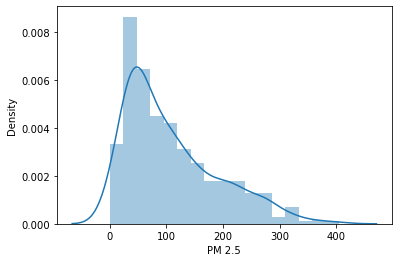

In [37]:
sns.distplot(Y)

## Train Test Split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

### Comparison Linear,Ridge and Lasso Regression

## Linear Regression

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [86]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3499.3561872902073


## Ridge Regression

In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [88]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [90]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3354.617157307126


## Lasso Regression

In [91]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [92]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900776.9343945177, tolerance: 424.6893591679955
  model = cd_fast.enet_coordinate_descent(
/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811011.9882575938, tolerance: 387.0578859777605
  model = cd_fast.enet_coordinate_descent(
/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894478.7604733068, tolerance: 411.01572370583324
  model = cd_fast.enet_coordinate_descent(
/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

{'alpha': 5}
-3356.4102569706833


In [93]:
print("Linear Regresion :" ,mean_mse)
print("Ridge Regression :", ridge_regressor.best_score_)
print("Lass Regression  :",lasso_regressor.best_score_)

Linear Regresion : -3499.3561872902073
Ridge Regression : -3354.617157307126
Lass Regression  : -3356.4102569706833


## Model Evaluation

Ridge Regression

In [116]:
prediction = ridge_regressor.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

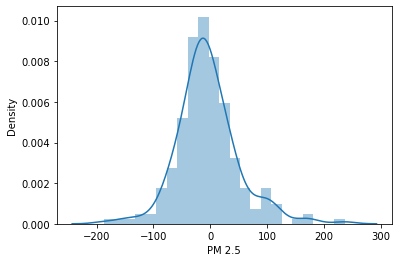

In [117]:
sns.distplot(Y_test-prediction)

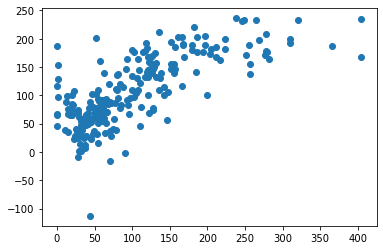

In [103]:
plt.scatter(Y_test,prediction)

Lass Regression

In [119]:
prediction = lasso_regressor.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

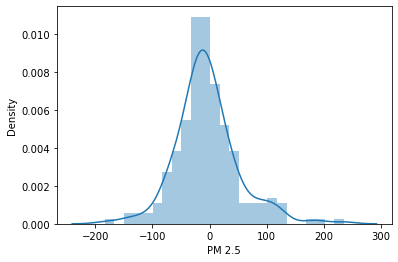

In [120]:
sns.distplot(Y_test-prediction)

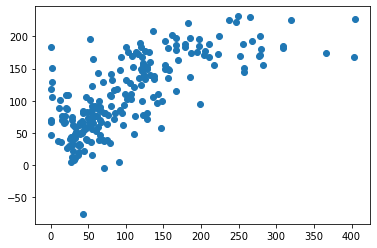

In [107]:
plt.scatter(Y_test,prediction)

Based on that Ridge is Better than the other two models

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [108]:
from sklearn import metrics

For Lasso Regression

In [121]:
print('Lasso Regression MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('Lasso Regression MSE:', metrics.mean_squared_error(Y_test, prediction))
print('Lasso Regression RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

Lasso Regression MAE: 40.15696946997223
Lasso Regression MSE: 3103.265102660339
Lasso Regression RMSE: 55.70695739905689


For Ridge Regression

In [118]:
print('Ridge Regression MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('Ridge Regression MSE:', metrics.mean_squared_error(Y_test, prediction))
print('Ridge Regression RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

Ridge Regression MAE: 39.69425975673827
Ridge Regression MSE: 3026.4268723629525
Ridge Regression RMSE: 55.01297003764615


In [122]:
import pickle 

In [124]:
# open a file, where you ant to store the data
file = open('ridge_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)